# Felipe Castillo 

http://thinkstats2.com

Assignement week one 

DSC530-T301 Data Exploration and Analysis


In [ ]:
#Exercise 1.1 

In [6]:
from __future__ import print_function, division

import sys
import os

import nsfg


#setting working directory to my directory
os.chdir ('C:\ExplorartoryDataAnalysis_DSC_530\ThinkStats2\code')


#sys.path.append('C:\ExplorartoryDataAnalysis_DSC_530\ThinkStats2\code')




Read NSFG data into a Pandas DataFrame.

In [8]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [9]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [11]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [12]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [13]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [14]:
pregordr[0]

1

Select a slice from a column.

In [15]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [16]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [17]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [18]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [19]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [25]:
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [14]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [26]:
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [29]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [30]:
preg['totalwgt_kg'] = preg.totalwgt_lb * 0.45359237
preg.totalwgt_kg.mean()

3.2956336316328243

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [31]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [32]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

resp.age_r.value_counts().sort_index()

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [21]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [22]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750


How old is the respondent with `caseid` 1?

In [34]:
resp[resp.caseid==1]
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [36]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [40]:
preg[preg.caseid==5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

Exersize 1.2

In [42]:
from __future__ import print_function, division

import numpy as np
import sys

import nsfg
import thinkstats2

In [45]:
resp2 = nsfg.ReadFemResp()
resp2.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [48]:
resp2.pregnum.value_counts().sort_index

<bound method Series.sort_index of 0     2610
2     1432
1     1267
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64>

In [50]:
sum(resp2.pregnum)

13593

In [52]:
preg = nsfg.ReadFemPreg()
len(preg.caseid)

13593

In [57]:
caseid = 10228
pregmap = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values


array([2, 2, 2], dtype=int64)

Exercise 2.1


Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late.

The answer to the question depends on who is the one that asks the question. According to  (Downey, 2014, pg. 24), a scientist might be interested in real effects, while the doctor might only care about clinically significant information, and the women thats pregnant might need ressurance that her baby wont be born late.

The reporting depends on the goal. Althought the histogram, is a great indicator for ditribution its not always realiable.
But the indication in figure (Downey, 2014, pg. 21) shows that more babys of the other category is arrive before first babies. The indication is abot 13 hours. Which is not all the significant. There could be issue with the sample size. Taking the mean could be as well. But its not always the best thing to use the mean 




References: Downey, A. B. (2014). Think Stats: Exploratory Data Analysis (2nd ed.). O'Reilly.



Which summary statistics would you use if you wanted to get a story on the evening news? Which ones would you use if you wanted to reassure an anxious patient?


Depending on the study, the mean and effect size could be used. The mean is used to deteremine if the issue occurs regularly or if the outcome is an outlier. An outlier could be use to show that its a rare indication. The significance of the data would be a revelent form of information. We can also used the effect size to see if the data  differes from other data. Maybe the data is different for births in Hawii then in Oklahoma. 

Overall there is different data that you can show an anxious paitent to reassure them. One being the standard deviation and the effect size. The other could be the mean, which shows occurinances. It might even be able to give the women an idea if there might need to be some procidure in the near future.



Finally, imagine that you are Celin Adams and your job is to answer the question "Do first babies arrive late?" Write a paragraph that uses the results in this chapter to answer the question clearly, precisely, and honestly.


According to Figure 2-5 (Downey, 2014, pg. 21), the histogram shows that most babies tend to arrive at the 39 week mark. This data descibes both other and first catogory babies.The mean pregnancy length for first babies is 38.601 weeks, and for other babies it is 38.523 weeks, a difference of about 13 hours (Downey, 2014, pg. 23). Using Cohen D the standard deviation .03 which is a very low difference. To summizer firt babies dont apper to be born late.



References: Downey, A. B. (2014). Think Stats: Exploratory Data Analysis (2nd ed.). O'Reilly.

Exercise 2.4

In [80]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

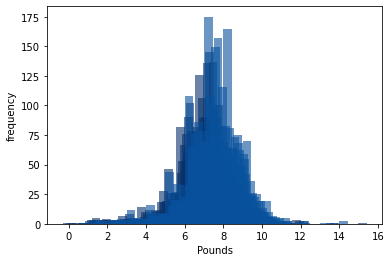

<Figure size 576x432 with 0 Axes>

In [86]:
first_hist = thinkstats2.Hist(firsts.totalwgt_lb)
other_hist = thinkstats2.Hist(others.totalwgt_lb)



width = 0.45
thinkplot.PrePlot(9)
thinkplot.Hist(first_hist, align='right', width = width)
thinkplot.Hist(other_hist, align='left', width = width)
thinkplot.Show(xlabel='Pounds', ylabel='frequency')






In [70]:
def CohenEffectSize(group1, group2):

    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

In [74]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

Cohen's d  first weight is about -0.09. Both weights have little to no effect. It does look like first babies are lighter then other babies. But the differen is so small that its not consider to have an effect.